# Pythonを使った数値計算の初歩
Create: 2018/02/06<br>
Author: drsenri (H. Shibata)

## 1. はじめに
このノートブックでは、Python (というよりもnumpy, pandas) での計算方法について学びます。<br>
数値計算の基本的な書き方、考え方を理解することが目的です。<br>
各々のメソッドの使用方法については、書籍やWebサイトを参照してください (本レポジトリのwikiに記載しています)。

## 2. ライブラリのインポート
まずは、数値計算ライブラリであるnumpy, pandasをインポートします (asを使って省略してnp, pdとするのが一般的)。<br>
下記のセルをCtrl+Enterで実行しましょう。

In [1]:
import numpy as np
import pandas as pd

## 3. numpyを使った計算例
いくつか数値計算の方法を見てみましょう。<br>
Python標準ライブラリとnumpyを比較し、numpyの基本的な書き方を理解しましょう。<br>
見るだけではなく、セルをコピーして自分で一部書き換えるなどして、実際に動かしながら理解度を高めましょう。

### 3-1. arrayを用いた計算の基本
numpyではarrayという配列もしくは行列を表現するデータ形式を使用します。

In [2]:
x = np.array([1, 2, 3])
np.mean(x) # 全要素の平均値を出力する

2.0

In [3]:
x = np.array([1, 2, 3])
np.power(x, 2) # 各要素の二乗のarrayを出力する

array([1, 4, 9], dtype=int32)

In [4]:
x = np.array([1, 2, 3])
np.where(x >= 2, 'a', 'b') # 各要素について、2以上なら'a', 2未満なら'b'に置き換えたarrayを出力する

array(['b', 'a', 'a'], 
      dtype='<U1')

### 3-2. for文はなるべく使わない
上記の計算をnumpyを使わず、標準ライブラリでfor文を使って実装してみましょう。<br>
numpyと比べて統一感や可読性が低く、処理速度も遅いコードになっています (numpyはC言語で実装されており、Pythonに比べて非常に高速です)。

In [5]:
x = [1, 2, 3]
res = 0
for i in x:
    res += i
print(res)

6


In [6]:
x = [1, 2, 3]
res = []
for i in x:
    res.append(i*i)
print(res)

[1, 4, 9]


In [7]:
x = [1, 2, 3]
res = []
for i in x:
    if i >= 2:
        res.append('a')
    else:
        res.append('b')
print(res)

['b', 'a', 'a']


### 3-3. ndarrayを使う
ndarrayとは、N-dimensional array, すなわち多次元配列を扱うクラスです。<br>
2次元であれば行と列を持ち、RDBのような構造を持ったデータを表現することができます。

In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.mean(x) # 全要素の平均値を出力する

3.5

In [10]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.shape(x) # ndarrayの次元数を出力する

(2, 3)

In [11]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x[0] # 1行目を出力する

array([1, 2, 3])

In [12]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[0, 2, 4], [1, 3, 5]])
x + y # 各要素同士の足し算をする

array([[ 1,  4,  7],
       [ 5,  8, 11]])

### 3-4. DataFrameを使う
DataFrameとは、pandasのクラスで、行名 (index) や列名 (columns) を持った二次元データです。<br>
データの加工、グラフ描画、ファイルの入出力といったデータハンドリングのインターフェースを豊富に備えている点が特長です。<br>
大規模なデータであれば、ndarrayよりも使いやすい場合が多いです。

In [13]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
x

,0,1,2
0,1,2,3
1,4,5,6


In [14]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns= ['a', 'b', 'c']) # 行名、列名を付与
x

,a,b,c
A,1,2,3
B,4,5,6


In [15]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns= ['a', 'b', 'c'])
x[['b']] # b列のみを抽出

,b
A,2
B,5


In [16]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns= ['a', 'b', 'c'])
x.apply(np.sum, axis = 0) # 列方向にnp.sum (合算) を適用する。axis=1にすると行方向に適用する

a    5
b    7
c    9
dtype: int64

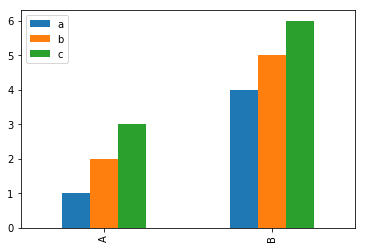

In [17]:
# %以下、プロット画像をノートブックに埋め込むマジックコマンド (一般的にはノートブックの上部のセルに記述する)
%matplotlib inline
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns= ['a', 'b', 'c'])
x.plot.bar() # 行ごとに数値を棒グラフ化

In [18]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns= ['a', 'b', 'c'])
x.T # 転置する

,A,B
a,1,4
b,2,5
c,3,6


## 4. 関数・メソッドの活用
numpy, pandasには上記以外にも様々な関数・メソッドが用意されています。<br>
全てを把握するのは難しいですが、知識をつけ、効率的な実装を行うようにしましょう。

### 4-1. 大きなarrayを作る
大きな配列を作成する場合、上記のようにnp.array([0, 1, ...])とするのは非常にコストがかかります。<br>
こうした場合は特定のパターンのarrayを作成する関数を利用しましょう。

In [19]:
np.arange(100) # 0から指定した数-1までのarrayを出力する

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [20]:
np.arange(10, 100, 2) # 引数を3つ与えた場合、始点、終点+1、間隔として解釈される

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [21]:
np.zeros(10) # 指定長さの、値が全て0のarrayを出力する

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [22]:
np.ones(10) # 値が全て1のarray

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### 4-2. 一次元のarrayから二次元のndarrayを作る
単一のarrayを二次元に展開したり、一次元のarrayを結合して二次元のarrayにするといった操作を行う場合があります。

In [23]:
x = np.arange(10, 100, 2)
x.reshape([5, 9]) # 5行, 9列のndarrayに変換

array([[10, 12, 14, 16, 18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36, 38, 40, 42, 44],
       [46, 48, 50, 52, 54, 56, 58, 60, 62],
       [64, 66, 68, 70, 72, 74, 76, 78, 80],
       [82, 84, 86, 88, 90, 92, 94, 96, 98]])

In [24]:
x = np.array([np.ones(3), np.zeros(3)])
y = np.array(np.arange(3))
np.vstack((x, y)) # 縦方向にarrayを連結する

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  2.]])

### 4-3. 2値化する
連続変数をしきい値を基準にして2値化する作業はデータ分析で必要になる場合があります。<br>
典型的なのが機械学習の教師データ作成、画像を白黒に変換するといった場合です。

In [25]:
x = np.random.rand(10)
print(x) # 中身の確認
np.where(x >= 0.5, 1, 0) # 0.5以上を1、0.5未満を0にする (つまり四捨五入)

[ 0.09558524  0.06660828  0.9578147   0.09861368  0.43350385  0.90176499
  0.67305823  0.99698102  0.29490431  0.92255358]


array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1])